In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
data = pd.read_excel('aggr_table.xlsx')

In [5]:
data.shape

(1624, 38)

In [6]:
data.drop(columns=['Unnamed: 0'], inplace=True)

In [7]:
my_proteins = data['UniProt ID']

In [8]:
data.dropna(subset=['PSP (Yes/No)', 'VL3(Pondr)_MDS'], inplace=True)

In [11]:
columns = data.columns

In [12]:
def find_duplicates(data, columns):
    dupl_idxs = np.zeros((len(columns), len(columns)))
    for id1, col1 in enumerate(columns):
        for id2, col2 in enumerate(columns):
            if (data[col1] != data[col2]).sum() == 0:
                # print(id1, id2)
                dupl_idxs[id1, id2] = True
    return dupl_idxs

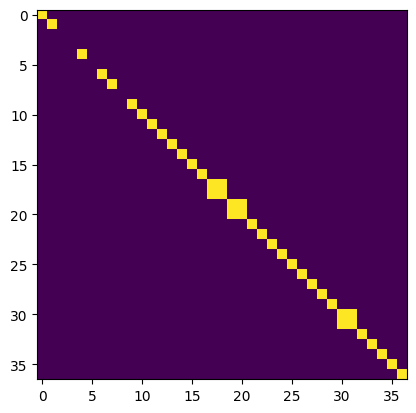

In [13]:
# plt.figure(figsize=(len(columns), len(columns)))
plt.imshow(find_duplicates(data, columns))
plt.show()

In [14]:
data.drop(columns=['VLXT(oDistProt)_PPDR', 'VSL2B(oDistProt)_PPDR', 'VSL2B(oDistProt)_MDS'], inplace=True)

In [15]:
columns = data.columns

In [16]:
data['MoRF'] = data['Total length of Morf residues'] / data['Length']

In [17]:
data.head()

,UniProt ID,UniProt AC,EC Number,Enzyme,Subcellular location,avg pred,Number of Morf regions,Total length of Morf residues,Источник,Percentage of Morf Residues,...,VL3(oDistProt)_MDS,VLXT(Pondr)_MDS,VLXT(oDistProt)_MDS,VSL2(Pondr)_MDS,CDF,CH,MeanDisorder6_MDS,PSP Score,PSP (Yes/No),MoRF
0,P04732,MT1E_HUMAN,0,0.0,Cell,0.005,0,0,ML Below,0.00000,...,1.056541,0.120353,0.120353,0.992206,0.174600,-0.221919,0.470581,0.1917,No,0.000000
1,P17096,HMGA1_HUMAN,0,0.0,Cell,0.130,3,53,ML Below,49.53271,...,0.995342,0.984034,0.984034,0.997472,-0.808521,0.400120,0.948493,0.9266,Yes,0.495327
2,Q9BYR4,KRA43_HUMAN,0,0.0,Cell,0.004,0,0,ML Below,0.00000,...,1.024604,0.027858,0.027858,0.996181,0.182800,-0.262690,0.450679,0.9155,Yes,0.000000
3,Q9BYR2,KRA45_HUMAN,0,0.0,Cell,0.004,0,0,ML Below,0.00000,...,1.005750,0.040021,0.040021,0.985693,0.182800,-0.262595,0.446970,0.9211,Yes,0.000000
4,Q9BYR0,KRA47_HUMAN,0,0.0,Cell,0.004,0,0,ML Below,0.00000,...,1.026279,0.027029,0.027029,0.987454,0.182800,-0.246820,0.442511,0.9073,Yes,0.000000


In [18]:
data.describe()

,Enzyme,avg pred,Number of Morf regions,Total length of Morf residues,Percentage of Morf Residues,Length,Disorder_PPDR,IUPred2A(Long)_PPDR,IUPred2A(Short)_PPDR,Pondr-Fit(oDistProt)_PPDR,...,VL3(Pondr)_MDS,VL3(oDistProt)_MDS,VLXT(Pondr)_MDS,VLXT(oDistProt)_MDS,VSL2(Pondr)_MDS,CDF,CH,MeanDisorder6_MDS,PSP Score,MoRF
count,1506.000000,1600.000000,1617.000000,1617.000000,1617.000000,1617.000000,1617.000000,1617.000000,1617.000000,1617.000000,...,1617.000000,1617.000000,1617.000000,1617.000000,1617.000000,1617.000000,1617.000000,1617.000000,1617.000000,1617.000000
mean,0.312085,0.084374,4.461348,81.615337,11.650677,585.975881,0.271247,0.206643,0.193890,0.278358,...,0.402644,0.404891,0.359289,0.359289,0.470602,0.012895,-0.119905,0.362783,0.300786,0.116507
std,0.463498,0.161301,7.862440,174.403177,15.936876,557.429804,0.234143,0.224927,0.178783,0.224666,...,0.174448,0.177203,0.152417,0.152417,0.160249,0.144618,0.118172,0.146465,0.344077,0.159369
min,0.000000,0.001000,0.000000,0.000000,0.000000,56.000000,0.000000,0.000000,0.000000,0.013736,...,0.060156,0.059763,0.027029,0.027029,0.161600,-0.808521,-0.549773,0.093559,0.001500,0.000000
25%,0.000000,0.004000,0.000000,0.000000,0.000000,261.000000,0.085524,0.033175,0.059921,0.108527,...,0.265162,0.267273,0.251410,0.251410,0.352658,-0.055500,-0.183831,0.253503,0.021900,0.000000
50%,0.000000,0.015000,2.000000,20.000000,4.555809,423.000000,0.200445,0.124638,0.132757,0.201571,...,0.366631,0.368219,0.335289,0.335289,0.430282,0.057129,-0.127836,0.327091,0.122700,0.045558
75%,1.000000,0.074000,6.000000,81.000000,17.210145,703.000000,0.405099,0.310757,0.280632,0.400000,...,0.516194,0.519897,0.454859,0.454859,0.567729,0.119329,-0.060485,0.451813,0.551000,0.172101
max,1.000000,0.981000,101.000000,1633.000000,82.136499,5890.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.056541,0.984034,0.984034,0.998049,0.182800,0.442479,0.948493,0.999100,0.821365


In [22]:
clean_data = data.drop(columns=['UniProt ID', 'UniProt AC', 'EC Number', 'Enzyme', 'Subcellular location', 'Источник','PSP (Yes/No)' ], inplace=False)

In [58]:
clean_data.columns

Index(['avg pred', 'Number of Morf regions', 'Total length of Morf residues',
       'Percentage of Morf Residues', 'Length', 'Disorder_PPDR',
       'IUPred2A(Long)_PPDR', 'IUPred2A(Short)_PPDR',
       'Pondr-Fit(oDistProt)_PPDR', 'VL3(Pondr)_PPDR', 'VL3(oDistProt)_PPDR',
       'VLXT(Pondr)_PPDR', 'VSL2(Pondr)_PPDR', 'MeanDisorder6_PPDR',
       'Disorder_MDS', 'IUPred2A(Long)_MDS', 'IUPred2A(Short)_MDS',
       'Pondr-Fit(oDistProt)_MDS', 'VL3(Pondr)_MDS', 'VL3(oDistProt)_MDS',
       'VLXT(Pondr)_MDS', 'VLXT(oDistProt)_MDS', 'VSL2(Pondr)_MDS', 'CDF',
       'CH', 'MeanDisorder6_MDS', 'PSP Score', 'MoRF'],
      dtype='object')

In [24]:
normalized_data = (clean_data-clean_data.mean())/clean_data.std()

In [61]:
df = normalized_data.reindex(columns=['Disorder_MDS', 'Disorder_PPDR', 'Pondr-Fit(oDistProt)_MDS','VSL2(Pondr)_MDS','IUPred2A(Long)_PPDR', 'VSL2(Pondr)_PPDR','Pondr-Fit(oDistProt)_PPDR', 
                                'IUPred2A(Long)_MDS','VL3(Pondr)_MDS', 'VL3(Pondr)_PPDR', 'IUPred2A(Short)_MDS', 'IUPred2A(Short)_PPDR','VLXT(Pondr)_MDS',
                                'VLXT(Pondr)_PPDR','Percentage of Morf Residues', 'CH','PSP Score', 'Total length of Morf residues',
                                'Number of Morf regions', 'Length', 'Aging relation from ML article', 'CDF'] )

In [84]:
df.rename(columns={ 'Disorder_MDS' : 'Disorder MDS','VSL2(Pondr)_MDS': 'VSL2 MDS', 'VSL2(Pondr)_PPDR' :  'VSL2 PPIDR', 'IUPred2A(Long)_PPDR' : 'IUPred2A(Long) PPIDR', 'Disorder_PPDR': 'Disorder PPIDR','Pondr-Fit(oDistProt)_MDS' : 'Pondr-Fit MDS', 'Pondr-Fit(oDistProt)_PPDR' : 'Pondr-Fit PPIDR',
                  'IUPred2A(Long)_MDS' : 'IUPred2A(Long) MDS', 'VL3(Pondr)_MDS' : 'VL3 MDS','VL3(Pondr)_PPDR' : 'VL3 PPIDR', 'IUPred2A(Short)_MDS' : 'IUPred2A(Short) MDS', 'IUPred2A(Short)_PPDR' : 'IUPred2A(Short) PPIDR', 
                  'VLXT(Pondr)_MDS': 'VLXT MDS', 'VLXT(Pondr)_PPDR' : 'VLXT PPIDR','Percentage of Morf Residues' : 'Percentage of MoRF Residues', 'Total length of Morf residues' : 'Total length of MoRF residues', 'Number of Morf regions'  :'Number of MoRF regions', 'Length' : 'Protein length'} , inplace=True)

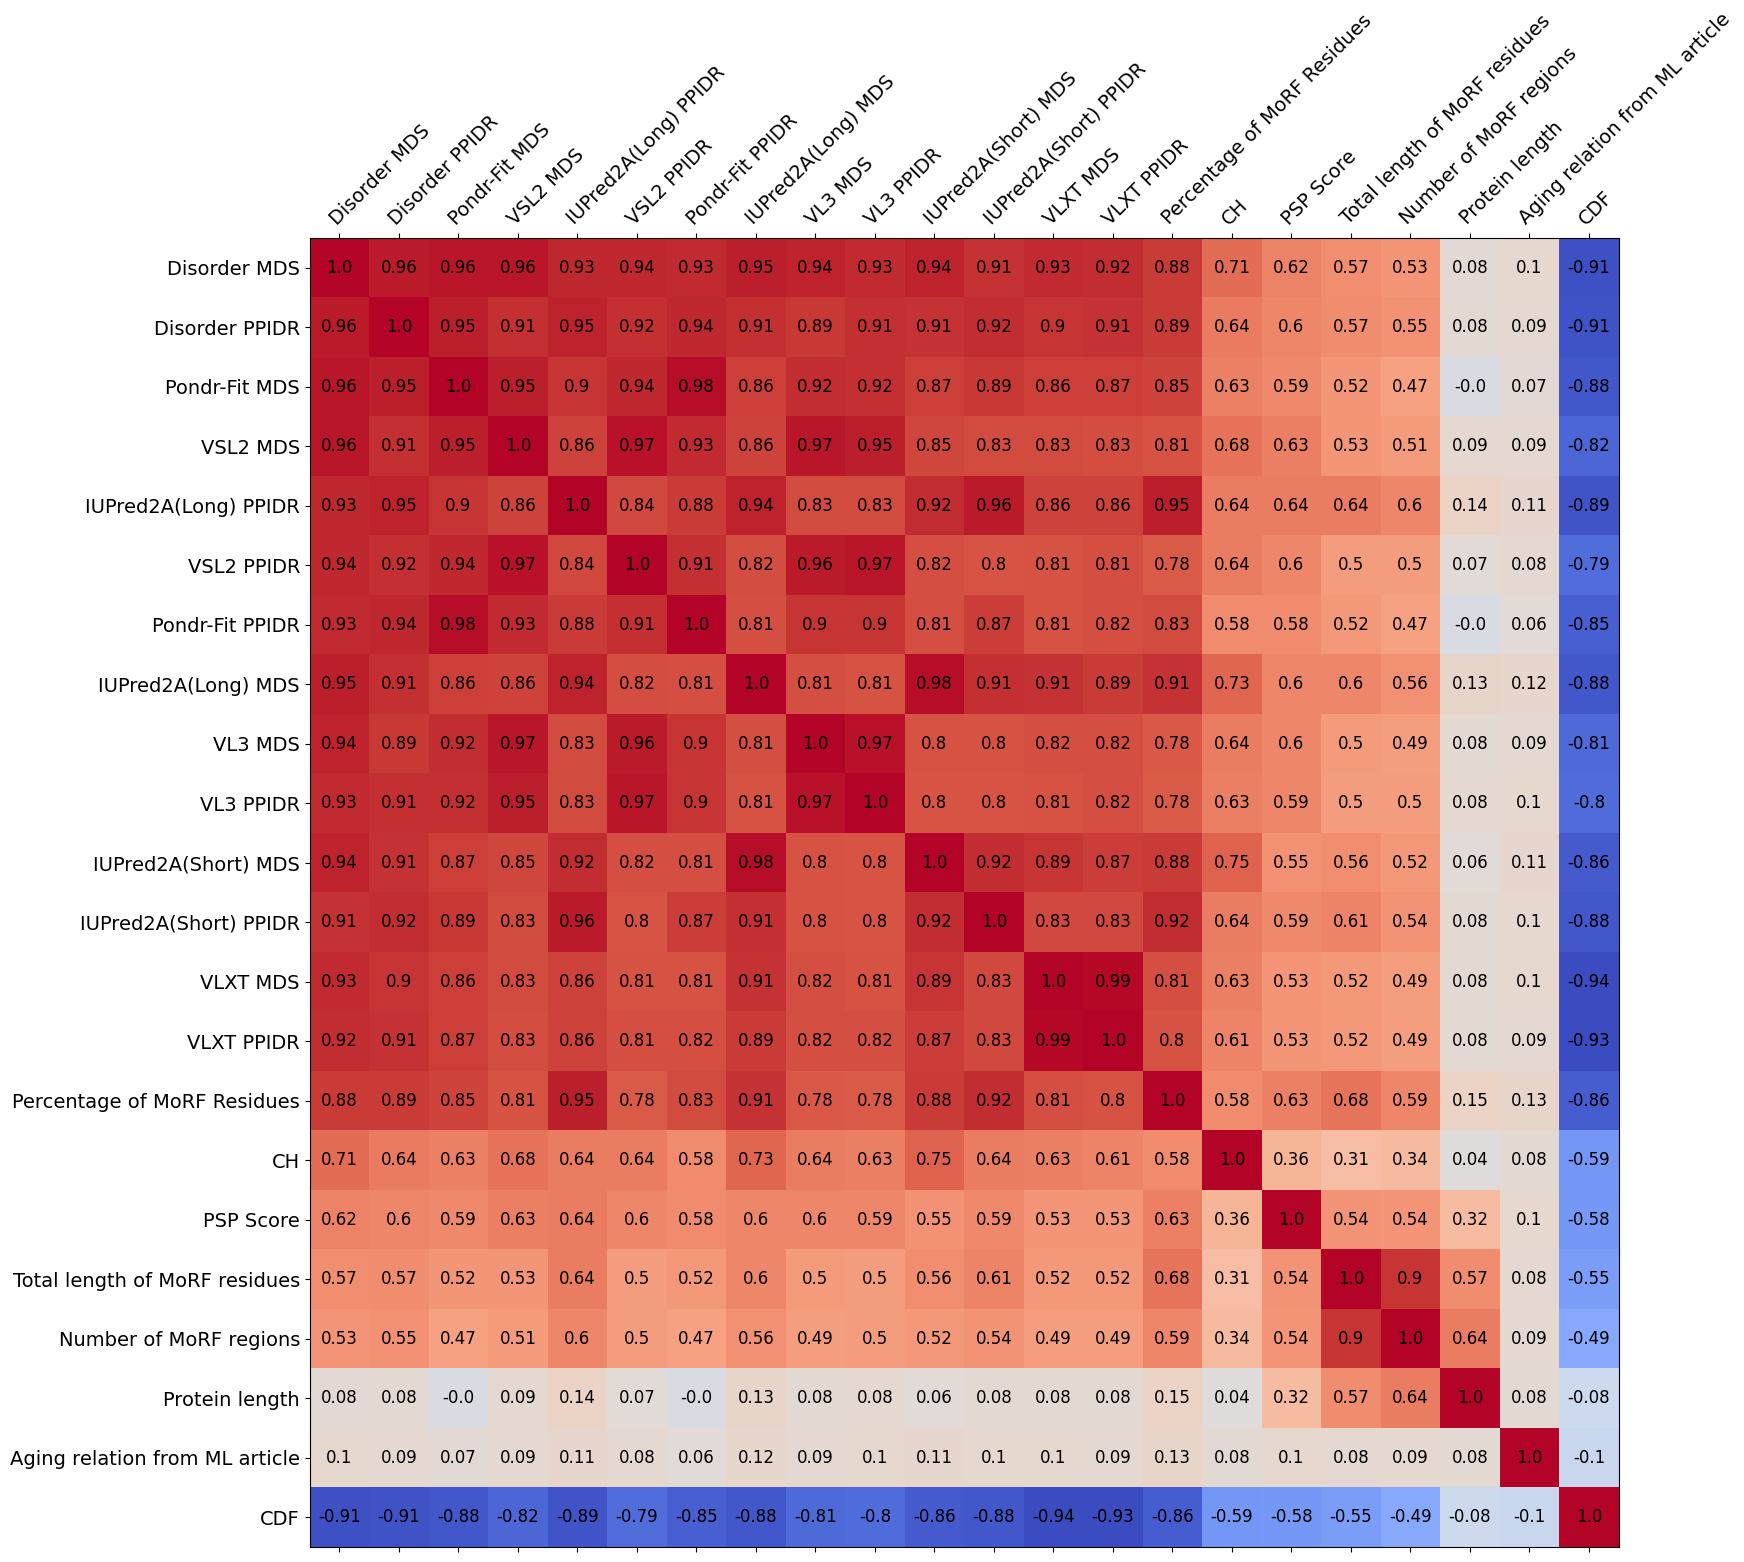

In [106]:
# Correlation matrix
corr = df.corr()
# corr.style.background_gradient(cmap='RdBu_r')
fig, ax = plt.subplots(figsize=(17,17))
ax.matshow(corr, cmap='coolwarm')
for (i, j), z in np.ndenumerate(corr):
    ax.text(j, i, round(z,2), ha='center', va='center', fontsize  =12)
ax.set_xticks(np.arange(len(list(list(df.columns)))))
ax.set_yticks(np.arange(len(list(list(df.columns)))))
ax.set_xticklabels(list(df.columns),fontsize  =14 )
ax.set_yticklabels(list(df.columns),fontsize  =14)
plt.setp(ax.get_xticklabels(), rotation=45, ha="left",
         rotation_mode="anchor")

plt.savefig('matrix_corr.png', bbox_inches  ='tight')
plt.show()